In [1]:
# Import required packages
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [2]:
print("********************************START OF DATA PREPRATION************************************")
data = pd.read_csv('wholesale.csv')
data.head()

********************************START OF DATA PREPRATION************************************


,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [3]:
import numpy as np
new_data = data.drop(['Channel','Region'], axis = 1)
#required_features = ['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicassen']

In [4]:
#Getting sample data to test
test_indices = [50, 150,200, 225, 300, 375, 430]

test_data = pd.DataFrame(new_data.loc[test_indices], columns = new_data.keys()).reset_index(drop = True)
test_data[:]

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,6269,1095,1980,3860,609,2162
1,16225,1825,1765,853,170,1067
2,3067,13240,23127,3941,9959,731
3,12680,3243,4157,660,761,786
4,16448,6243,6360,824,2662,2005
5,5841,1450,1162,597,476,70
6,3097,4230,16483,575,241,2080


In [5]:
new_data.describe()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


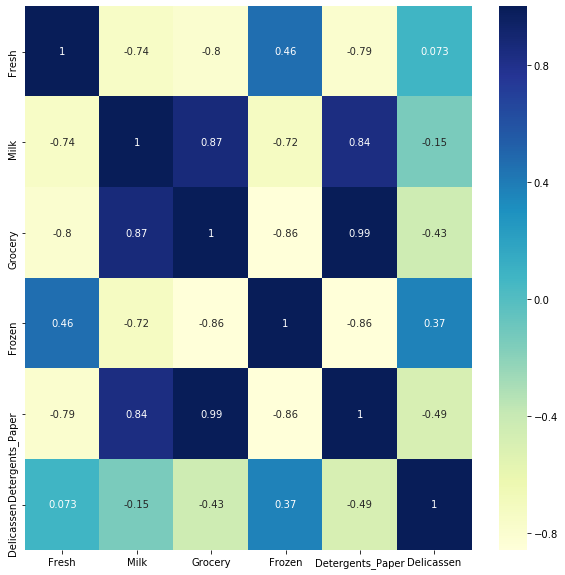

In [6]:

    # heatmap plot
import seaborn as sns
import matplotlib.pyplot as plt
Var_Corr = new_data.corr()
top_corr_features = Var_Corr.index
plt.figure(figsize=(10,10))
sns.heatmap(Var_Corr[top_corr_features].corr(), annot=True, cmap = "YlGnBu")


In [7]:
# applying natural log to reduce the distribution less skewed 
log_data = np.log(new_data)

log_test=np.log(test_data)

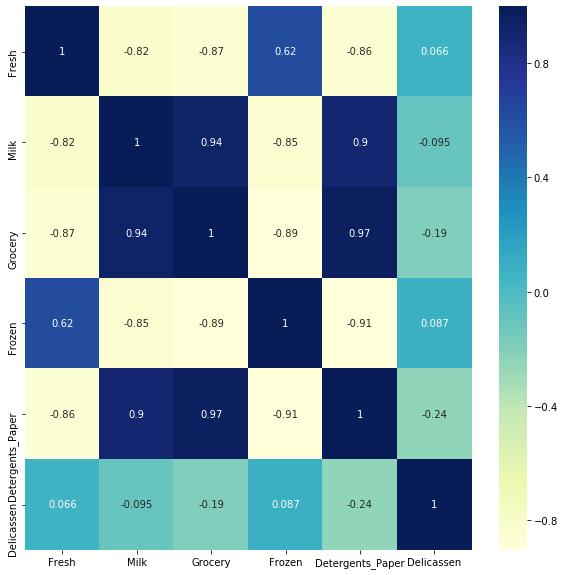

In [8]:

    # heatmap plot
import seaborn as sns
import matplotlib.pyplot as plt
Var_Corr = log_data.corr()
top_corr_features = Var_Corr.index
plt.figure(figsize=(10,10))
sns.heatmap(Var_Corr[top_corr_features].corr(), annot=True, cmap = "YlGnBu")


In [9]:
outliers = []
dict_set  = {}

#detecting the outliers for each feature
for feature in log_data.keys():
    # TODO: Calculate Q1 (25th percentile of the data) for the given feature
    Q1 = np.percentile(log_data[feature], 25)
    
    # TODO: Calculate Q3 (75th percentile of the data) for the given feature
    Q3 = np.percentile(log_data[feature], 75)
    
    # TODO: Use the interquartile range to calculate an outlier step (1.5 times the interquartile range)
    step = 1.5 * (Q3-Q1)
    
    # Display the outliers
    feature_outliers = log_data[~((log_data[feature] >= Q1 - step) & (log_data[feature] <= Q3 + step))]
    print ("{} num outliers: {}".format(feature, len(feature_outliers)))
    
    outliers.append(feature_outliers.index.tolist())

# display the indexes found for each feature as outliers
outliers[:]

Fresh num outliers: 16
Milk num outliers: 4
Grocery num outliers: 2
Frozen num outliers: 10
Detergents_Paper num outliers: 2
Delicassen num outliers: 14


[[65, 66, 81, 95, 96, 128, 171, 193, 218, 304, 305, 338, 353, 355, 357, 412],
 [86, 98, 154, 356],
 [75, 154],
 [38, 57, 65, 145, 175, 264, 325, 420, 429, 439],
 [75, 161],
 [66, 109, 128, 137, 142, 154, 183, 184, 187, 203, 233, 285, 289, 343]]

In [10]:
#detecting if outliers are present in multiple features
store_values =[]
for i in outliers:
    #print("hello")
    for j in outliers:
        intersected_values = set.intersection(set(i), set(j))
        if i == j:
            print("same subset")
        else:
            if len(intersected_values) :
                store_values.append(list(intersected_values))            
print(store_values)


same subset
same subset
same subset
same subset
same subset
same subset
[[65], [128, 66], [154], [154], [154], [75], [154], [65], [75], [128, 66], [154], [154]]


In [11]:
#making an list of indexes that is outliers in multiple features
outliers_index = []
mylist = []
myset = set()
for item in store_values:
    for i in item:
        #print (i)
        if i not in outliers_index:
            #myset.add(item)
            outliers_index.append(i)
       
    
    
print(outliers_index)    

[65, 128, 66, 154, 75]


In [12]:
# removing the above indexes as they are outliers in multiple features
cleaned_data = log_data.drop(log_data.index[outliers_index]).reset_index(drop = True)

print("*************************END OF DATA PREPRATION*************************")

*************************END OF DATA PREPRATION*************************


In [13]:
print("*************************START OF FEATURE ENGINEERING*******************")
from sklearn.decomposition import PCA
pca = PCA(n_components=2).fit(cleaned_data)

# TODO: Transform the good data using the PCA fit above
reduced_data = pca.transform(cleaned_data)

# Create a DataFrame for the reduced data
reduced_data = pd.DataFrame(reduced_data, columns = ['Dimension 1', 'Dimension 2'])

reduced_test =  pca.transform(log_test)

*************************START OF FEATURE ENGINEERING*******************


In [14]:
reduced_test[:]

array([[ 1.14037884, -0.67102415],
       [ 1.94055462, -0.24183189],
       [-2.99033876, -0.36445596],
       [ 0.16700047, -0.01364392],
       [-1.28038736, -0.95868772],
       [ 1.61592629,  2.00800996],
       [-0.08563488,  0.4483062 ]])

In [15]:
from sklearn.metrics import silhouette_score 

matrix = reduced_data
for n_clusters in range(2,10):
    kmeans = KMeans(init='k-means++', n_clusters = n_clusters, n_init=100)
    kmeans.fit(matrix)
    clusters = kmeans.predict(matrix)
    silhouette_avg = silhouette_score(matrix, clusters)
    print("For n_clusters =", n_clusters, "The average silhouette_score is :", silhouette_avg)

For n_clusters = 2 The average silhouette_score is : 0.42628101546910835
For n_clusters = 3 The average silhouette_score is : 0.3971382088445873
For n_clusters = 4 The average silhouette_score is : 0.33184127600936947
For n_clusters = 5 The average silhouette_score is : 0.352208874352643
For n_clusters = 6 The average silhouette_score is : 0.36574019839623
For n_clusters = 7 The average silhouette_score is : 0.3649035324848901
For n_clusters = 8 The average silhouette_score is : 0.36571729232238914
For n_clusters = 9 The average silhouette_score is : 0.36356848740043035


In [16]:
n_clusters = 2
kmeans = KMeans(init='k-means++', n_clusters = n_clusters, n_init=30)
kmeans.fit(matrix)
clusters_customers = kmeans.predict(matrix)
test_preds = kmeans.predict(reduced_test)
silhouette_avg = silhouette_score(matrix, clusters_customers)
print('score de silhouette: {:<.3f}'.format(silhouette_avg))
#print(clusters_customers)
test_preds[:]

score de silhouette: 0.426


array([1, 1, 0, 1, 0, 1, 1], dtype=int32)

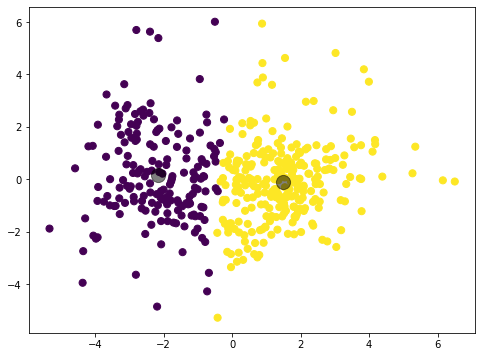

In [17]:
plt.figure(figsize=(8, 6))
plt.scatter(matrix.iloc[:, 0], matrix.iloc[:, 1], c=clusters_customers, s=50, cmap='viridis')
#select cluster centers
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);

In [18]:
log_centers = pca.inverse_transform(centers)
# TODO: Exponentiate the centers
true_centers = np.exp(log_centers)

# Display the true centers
segments = ['Segment {}'.format(i) for i in range(0,len(centers))]
true_centers = pd.DataFrame(np.round(true_centers), columns = new_data.keys())
true_centers.index = segments
display(true_centers)

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
Segment 0,4005.0,7900.0,12104.0,952.0,4561.0,1036.0
Segment 1,8867.0,1897.0,2477.0,2088.0,294.0,681.0


In [19]:
display(data.describe())

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,1.322727,2.543182,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,0.468052,0.774272,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,1.000000,1.000000,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,1.000000,2.000000,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,1.000000,3.000000,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,2.000000,3.000000,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,2.000000,3.000000,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


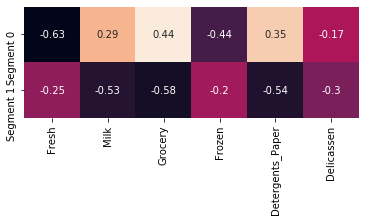

In [20]:
sns.heatmap((true_centers-new_data.mean())/new_data.std(ddof=1), annot=True, cbar=False, square=True)

In [21]:
print("segment 1 might be grocery stores as the consumption of milk grocery and detergents paper is higher and segment 0 might be resturents as they are not stocking up food and have high demand for both frozen and fresh food")

segment 1 might be grocery stores as the consumption of milk grocery and detergents paper is higher and segment 0 might be resturents as they are not stocking up food and have high demand for both frozen and fresh food


In [22]:
for i, pred in enumerate(test_preds):
    print ("Sample point", i, "predicted to be in Cluster", pred)
print("cluster 0  : Hotel/Restaurant/Cafe")
print("cluster 1 : Retailers")
#test_data[:]
#print(pd.DataFrame(data.loc[test_indices], columns = data.keys()).reset_index(drop = True))

Sample point 0 predicted to be in Cluster 1
Sample point 1 predicted to be in Cluster 1
Sample point 2 predicted to be in Cluster 0
Sample point 3 predicted to be in Cluster 1
Sample point 4 predicted to be in Cluster 0
Sample point 5 predicted to be in Cluster 1
Sample point 6 predicted to be in Cluster 1
cluster 0  : Hotel/Restaurant/Cafe
cluster 1 : Retailers


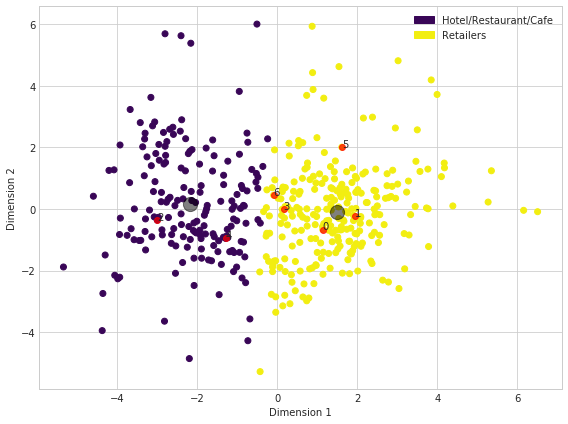

In [23]:
import matplotlib.patches as mpatches
#plt.scatter(matrix[:, 0], matrix[:, 1], c=clusters_customers,label=lab, s=50, cmap='viridis')
#select cluster centers
#centers = kmeans.cluster_centers_
#plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);

colormap = np.array(['#390657', '#f2ee11'])
centers = kmeans.cluster_centers_
with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(8, 6))
    ax = plt.gca()

    ax.scatter(matrix.iloc[:,0],matrix.iloc[:,1], c=colormap[clusters_customers],cmap='viridis')
    ax.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);
    #ax.scatter(reduced_test[:,0], reduced_test[:,1], c='black', s=300, alpha=0.6)
    
    plt.plot(reduced_test[:,0],reduced_test[:,1], 'ro', alpha = 0.7)
    for i in range(reduced_test.shape[0]):
        plt.text(reduced_test[i,0], reduced_test[i,1], str(i))

    pop_a = mpatches.Patch(color='#390657', label='Hotel/Restaurant/Cafe')
    pop_b = mpatches.Patch(color='#f2ee11', label='Retailers')
    plt.xlabel('Dimension 1')
    plt.ylabel('Dimension 2')
    plt.legend(handles=[pop_a,pop_b])
    plt.tight_layout()
    plt.show()
    
    
